In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from LLM_dialogue_generator import LLMDialogueGenerator
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
chatbot = LLMDialogueGenerator(device='cuda:0')

Loading checkpoint shards: 100%|██████████| 4/4 [00:00<00:00,  7.81it/s]


Using device: cuda:0


In [3]:
def get_img(idx,GSV_rootpath):
    
    GSV_name = GSV_metadata.iloc[idx]['panoid']
    GSV_list = [f"{GSV_rootpath}/{GSV_name[0]}/{GSV_name[1]}/{GSV_name}_{angle}.jpg" for angle in range(0, 360, 90)]
    for i,path in enumerate(GSV_list):
        if i == 0:
            GSV_img = np.array(Image.open(GSV_list[0]))
        else:
            GSV_img = np.concatenate((GSV_img, np.array(Image.open(path))), axis=1)

    # visualization
    # plt.imshow(GSV_img)
    # plt.title('GSV from original dataset')
    # plt.axis('off')
    return GSV_img

GSV_metadata_path = '/data_nas/GoogleSV/metadata/China/HongKong/pano_2024-08-17 13:11:09.125553_23512.p' # Hong Kong SVI
GSV_metadata = pd.read_pickle(GSV_metadata_path)

In [4]:
GSV_rootpath = "/data_nas/GoogleSV/images/China/HongKong"
random_indices = GSV_metadata.sample(n=1).index.tolist()
idx = random_indices[0]
GSV_img = get_img(idx, GSV_rootpath)

In [ ]:
# QA process
def count_characters(s):
    return len(s)


def chat_process(question_list):
    for i, question in enumerate(question_list):
        # print(f"chat round {i}")
        if i == 0:
            conversation = chatbot.generate_conversation(result=None, next_question=question[0], image=None)
            answer = chatbot.dialogue(conversation,max_new_tokens=500)
        else:
            if question[1] is not None:
                conversation = chatbot.generate_conversation(answer, question[0], image=True)
                answer = chatbot.dialogue(conversation, GSV_img=question[1],max_new_tokens=500)
            else:
                conversation = chatbot.generate_conversation(result=answer, next_question=question[0], image=None)
                answer = chatbot.dialogue(conversation,max_new_tokens=500)
        print(f"len of answer: {count_characters(answer)}")
    return answer

profile = {
    "age": 30,
    "gender": "male",
    "location": "Hong Kong",
    "event": "murder"
}
question_list = [
    [f"Please design a {profile['event']}-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment", None],
    ["Based on your answers, evaluate the safety perception brought to you by the street scenes in the panoramic street view image one by one.", GSV_img],
    [f"When evaluating the safety perception of specific criminal behaviors, it is important to consider the sensitivity of different demographic groups to their environment. For {profile['gender']}, which parts of the image would you emphasize?", None],
    [f"For individuals around the age of {profile['age']}, what factors in the image do you think would impact their sense of safety?", None],
    [f"When discussing the safety perception in {profile['location']}, what is the characteristics of the built environment, and how these characteristics will influence people's safety perception?", None],
    [f"In assessing safety perception regarding {profile['event']}, what do you believe are the important part of the image?", None],
    ["Based on your answers, evaluate the safety perception brought to you by the street scenes in the panoramic street view image one by one.", None],
    ["Taking into account all the above points, what is your overall view of the safety perception in this location?", None]
    # ["Now, we try to focus on the females, if you were to evaluate the safety perception of women in their 30s, and rate the results from 1 to 10, with 1 being the least safe and 10 being the safest, what results would you give? Please note that if the information given in the image is insufficient to reflect the characteristics, it will be marked 'not applicable'.", GSV_img]
]

GSV_img = get_img(200005, GSV_rootpath)
answer = chat_process(question_list)

In [5]:
# question_list = [
#     ["Please design a murder-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment", None],
#     ["Based on your answers, evaluate the safety perception brought to you by the street scenes in the panoramic street view image one by one.", GSV_img],
#     ["Based on your analysis, if you were to rate the results of your analysis from 1 to 10, with 1 being the least safe and 10 being the safest, what results would you give? Please note that if the information given in the image is insufficient to reflect the characteristics, it will be marked 'not applicable'.", None],
#     ["Very good! Based on your result, if you were to evaluate the safety perception of men in their 30s, and rate the results from 1 to 10, with 1 being the least safe and 10 being the safest, what results would you give? Please note that if the information given in the image is insufficient to reflect the characteristics, it will be marked 'not applicable'.", GSV_img],
#     ["Now, we try to focus on the females, if you were to evaluate the safety perception of women in their 30s, and rate the results from 1 to 10, with 1 being the least safe and 10 being the safest, what results would you give? Please note that if the information given in the image is insufficient to reflect the characteristics, it will be marked 'not applicable'.", GSV_img]
# ]

In [22]:
# QA process
def count_characters(s):
    return len(s)


def chat_process(question_list):
    for i, question in enumerate(question_list):
        # print(f"chat round {i}")
        if i == 0:
            conversation = chatbot.generate_conversation(result=None, next_question=question[0], image=None)
            answer = chatbot.dialogue(conversation,max_new_tokens=500)
        else:
            if question[1] is not None:
                conversation = chatbot.generate_conversation(answer, question[0], image=True)
                answer = chatbot.dialogue(conversation, GSV_img=question[1],max_new_tokens=500)
            else:
                conversation = chatbot.generate_conversation(result=answer, next_question=question[0], image=None)
                answer = chatbot.dialogue(conversation,max_new_tokens=500)
    return answer

random_indices = GSV_metadata.sample(n=100).index.tolist()
# idx = random_indices[0]

GSV_rootpath = "/data_nas/GoogleSV/images/China/HongKong"
profile = {
    "age": 30,
    "gender": "male",
    "location": "Hong Kong",
    "event": "murder"
}
answer_list = []
question_list = [
    [f"Please design a {profile['event']}-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment", None],
    ["Based on your answers, evaluate the safety perception brought to you by the street scenes in the panoramic street view image one by one.", GSV_img],
    [f"When evaluating the safety perception of specific criminal behaviors, it is important to consider the sensitivity of different demographic groups to their environment. For {profile['gender']}, which parts of the image would you emphasize?", None],
    [f"For individuals around the age of {profile['age']}, what factors in the image do you think would impact their sense of safety?", None],
    [f"When discussing the safety perception in {profile['location']}, what is the characteristics of the built environment, and how these characteristics will influence people's safety perception?", None],
    [f"In assessing safety perception regarding {profile['event']}, what do you believe are the important part of the image?", None],
    ["Based on your answers, evaluate the safety perception brought to you by the street scenes in the panoramic street view image one by one.", None],
    ["Taking into account all the above points, what is your overall view of the safety perception in this location?", None]
    # ["Now, we try to focus on the females, if you were to evaluate the safety perception of women in their 30s, and rate the results from 1 to 10, with 1 being the least safe and 10 being the safest, what results would you give? Please note that if the information given in the image is insufficient to reflect the characteristics, it will be marked 'not applicable'.", GSV_img]
]

for idx in random_indices:
    GSV_img = get_img(idx, GSV_rootpath)
    answer = chat_process(question_list)
    answer_list.append([idx, answer])

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

KeyboardInterrupt: 

In [25]:
def generate_dataset_unit(GSV_idx, GSV_name, GSV_rootpath, answer, profile):
    dataset_unit = {
    "GSV_idx": GSV_idx,
    "GSV_name": GSV_name,
    "GSV_path":[f"{GSV_rootpath}/{GSV_name[0]}/{GSV_name[1]}/{GSV_name}_{angle}.jpg" for angle in range(0, 360, 90)],
    "text_description": answer,
    "age":profile['age'],
    "gender": profile['gender'],
    "location": profile['location'],
    "event": profile['event']
    }
    return dataset_unit

In [31]:
import pickle

dataset_list = []
for answer in answer_list:
    GSV_idx = answer[0]
    GSV_name = GSV_metadata.iloc[GSV_idx]['panoid']
    GSV_rootpath = "/data_nas/GoogleSV/images/China/HongKong"
    text_expression = answer[1]
    dataset_list.append(generate_dataset_unit(GSV_idx, GSV_name, GSV_rootpath, text_expression, profile))

with open('/data_nas/cehou/LLM_safety/dataset_list.pkl', 'wb') as f:
    pickle.dump(dataset_list, f)

In [27]:
dataset_list

[{'GSV_idx': 251698,
  'GSV_name': 'WQNDkBzoSGcjurlgcfILlg',
  'GSV_path': ['/data_nas/GoogleSV/images/China/HongKong/W/Q/WQNDkBzoSGcjurlgcfILlg_0.jpg',
   '/data_nas/GoogleSV/images/China/HongKong/W/Q/WQNDkBzoSGcjurlgcfILlg_90.jpg',
   '/data_nas/GoogleSV/images/China/HongKong/W/Q/WQNDkBzoSGcjurlgcfILlg_180.jpg',
   '/data_nas/GoogleSV/images/China/HongKong/W/Q/WQNDkBzoSGcjurlgcfILlg_270.jpg'],
  'text_description': "[INST] Please design a murder-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment [/INST] Street Safety Perception Rating Scale:\n\n1. Lighting:\n* Adequate street lighting\n* Insufficient street lighting\

In [19]:
GSV_idx = idx
GSV_name = GSV_metadata.iloc[idx]['panoid']
GSV_rootpath = "/data_nas/GoogleSV/images/China/HongKong"
answer = answer_list[0]

# create dataset
dataset_list = []
for i in range(10):
    dataset_list.append(generate_dataset_unit(GSV_idx, GSV_name, GSV_rootpath, answer, profile))

In [20]:
dataset_list

[{'GSV_idx': 267920,
  'GSV_name': 'h2v7z0MUgrjZmOICNi8Y2w',
  'GSV_path': ['/data_nas/GoogleSV/images/China/HongKong/h/2/h2v7z0MUgrjZmOICNi8Y2w_0.jpg',
   '/data_nas/GoogleSV/images/China/HongKong/h/2/h2v7z0MUgrjZmOICNi8Y2w_90.jpg',
   '/data_nas/GoogleSV/images/China/HongKong/h/2/h2v7z0MUgrjZmOICNi8Y2w_180.jpg',
   '/data_nas/GoogleSV/images/China/HongKong/h/2/h2v7z0MUgrjZmOICNi8Y2w_270.jpg'],
  'text_description': "[INST] Please design a murder-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment [/INST] Street Safety Perception Rating Scale:\n\n1. Lighting:\n* Adequate street lighting\n* Insufficient street lighting\

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# generate a dataset for pytorch
# for idx, answer in answer_list:
class GSVImageDataset(Dataset):
    def __init__(self, metadata, images, transform=None):
        self.metadata = metadata
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        label = self.metadata.iloc[idx]['id']
        return image, label

# Assuming GSV_img is a list of images corresponding to the metadata
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = GSVImageDataset(metadata=GSV_metadata, images=[GSV_img], transform=transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)

In [8]:
for i in range(len(answer_list)):
    print(f"GSV index: {answer_list[i][0]}")
    print(f"Answer: {answer_list[i][1]} \n")

GSV index: 89540
Answer: [INST] Please design a murder-focused street safety perception system rating scale and list in as much detail as possible the different information that people pay attention to in street perception by looking around the built environment (elements of the urban environment that Street View images can capture). Note that we cannot provide subjective information about residents' personal experiences, so look for key points from the objective environment [/INST] Street Safety Perception Rating Scale:

1. Lighting:
* Adequate street lighting
* Insufficient street lighting
* Poorly placed street lighting
* Overhead street lighting
* Street lighting with motion sensors
2. Pedestrian walkways:
* Wide, well-maintained walkways
* Narrow, poorly maintained walkways
* Lack of walkways
* Walkways with obstructions
3. Traffic calming measures:
* Speed bumps
* Traffic circles
* Traffic signs and signals
* Road markings
4. Visibility:
* Clear line of sight
* Obstructed line of

In [87]:
import re
def tidy_df(answer_list, answer_idx):
    '''
    answer index: 4 for male, 5 for female
    '''
    df = pd.DataFrame(columns=['category', 'score', 'explanation'])
    for line in answer_list[1].split(' [/INST] ')[answer_idx].split('\n'):
        pattern = r'^\d+'
        if re.match(pattern, line):
            # print(line)
            number = re.search(r'^\d+', line).group()
            category = re.search(r'\d+\.\s+([^:]+):', line).group(1)
            if re.search(r'(\d+/\d+)', line) is None:
                score = re.search(r':\s*(Not applicable)', line).group(1)
            else:
                score = re.search(r'(\d+/\d+)', line).group(1)
            explanation = re.search(r'\((.*?)\)', line).group(1)
            df = df.append({'category': category, 'score': score, 'explanation': explanation}, ignore_index=True)
            # print(f"number: {number}, category: {category}, score: {score}, explanation: {explanation}")
        
    df = df.T.reset_index(drop=True)
    df.columns = df.iloc[0]
    df = df.drop(0)
    df['idx'] = answer_list[0]
    if answer_idx == 4: # male
        df['gender'] = 'male'
    elif answer_idx == 5:
        df['gender'] = 'female'
    
    return df

all_df = pd.DataFrame()
for i in range(len(answer_list)):
    df_male = tidy_df(answer_list[i], 4)
    df_female = tidy_df(answer_list[i], 5)
    df_group = pd.concat([df_male,df_female],axis=0)
    all_df = pd.concat([all_df, df_group], axis=0)

In [88]:
all_df

,idx,gender
1,607891,male
2,607891,male
1,607891,female
2,607891,female
1,577194,male
...,...,...
2,515761,female
1,638950,male
2,638950,male
1,638950,female


In [22]:
import re

text = '1. Lighting: 8/10 (Adequate lighting contributes to a sense of safety.)'

# 提取编号
number = re.search(r'^\d+', text).group()

# 提取类别
category = re.search(r'\d+\.\s+([^:]+):', text).group(1)

# 提取评分
score = re.search(r'(\d+/\d+)', text).group(1)

# 提取解释
explanation = re.search(r'\((.*?)\)', text).group(1)

print(f"编号: {number}")
print(f"类别: {category}")
print(f"评分: {score}")
print(f"解释: {explanation}")

编号: 1
类别: Lighting
评分: 8/10
解释: Adequate lighting contributes to a sense of safety.


In [16]:
answer_list[0][1].split(' [/INST] ')[5].split('\n')


["Based on the analysis provided, here's a rating for each element in the image from the perspective of a woman in her 30s:",
 '',
 '1. Lighting: 8/10 (Adequate lighting contributes to a sense of safety.)',
 '2. Pedestrian walkways: 9/10 (Wide and well-maintained sidewalks contribute to a sense of safety.)',
 '3. Traffic calming measures: 4/10 (No visible traffic calming measures could be a concern for safety perception.)',
 '4. Visibility: 8/10 (Clear visibility of street signs and markings contributes to a sense of safety.)',
 '5. Surveillance: 4/10 (No visible surveillance cameras or security personnel could be a concern for safety perception.)',
 '6. Landscaping: 9/10 (Well-maintained landscaping contributes to a sense of safety and orderliness.)',
 '7. Fencing and barriers: 5/10 (No visible fencing or barriers could be a concern for safety perception.)',
 '8. Street furniture: 8/10 (The presence of benches and trash cans contributes to a sense of safety and orderliness.)',
 '9. Gr

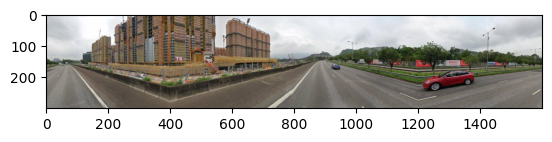

In [11]:
answer_list[0][1]
plt.imshow(get_img(answer_list[0][0]))
plt.show()

In [8]:
tem = answer.split('<\\s>')
tem[3].split(' [/INST] ')[1].split('\n')

["Based on the analysis provided, here's a rating for each element in the image from the perspective of a man in his 30s:",
 '',
 '1. Lighting: 8/10 (Adequate lighting contributes to a sense of safety.)',
 '2. Pedestrian walkways: 9/10 (Wide and well-maintained sidewalks contribute to a sense of safety.)',
 '3. Traffic calming measures: 4/10 (No visible traffic calming measures could be a concern for safety perception.)',
 '4. Visibility: 8/10 (Clear visibility of street signs and markings contributes to a sense of safety.)',
 '5. Surveillance: 4/10 (No visible surveillance cameras or security personnel could be a concern for safety perception.)',
 '6. Landscaping: 9/10 (Well-maintained landscaping contributes to a sense of safety and orderliness.)',
 '7. Fencing and barriers: 5/10 (No visible fencing or barriers could be a concern for safety perception.)',
 '8. Street furniture: 8/10 (The presence of benches and trash cans contributes to a sense of safety and orderliness.)',
 '9. Graf

In [9]:
import re

text = '12. Accessibility: 9/10 (Ramps and curb cuts for wheelchair users)'
score_list = []
for line in tem[4].split(' [/INST] ')[1].split('\n'):
    matched = re.search(r'(\d+/\d+)', line)
    if matched:
        score = matched.group(1)
        score_list.append(score)
        print(score)


8/10
9/10
4/10
8/10
4/10
9/10
5/10
8/10
9/10
9/10
7/10
4/10
5/10
5/10
